In [ ]:
# https://www.analyticsvidhya.com/blog/2021/11/newbies-deep-learning-project-to-recognize-handwritten-digit/

!pip install numpy
!pip install tensorflow
!pip install keras
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import packages (MNIST dataset included in keras, NOT loaded individually)
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K
#  splitting data: test set vs. training set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [ ]:
# preprocessing inputs 

num_classes = 10

# reshaping images to standard size
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# conversion of class vectors to matrices of  binary class 
y_train = keras.utils.to_categorical(y_train, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
# creating the actual CNN model

batch_size = 128
epochs = 30
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [ ]:
# attempt to add a graph to track fit of the model as it learns
## https://medium.com/geekculture/how-to-plot-model-loss-while-training-in-tensorflow-9fa1a1875a5

class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

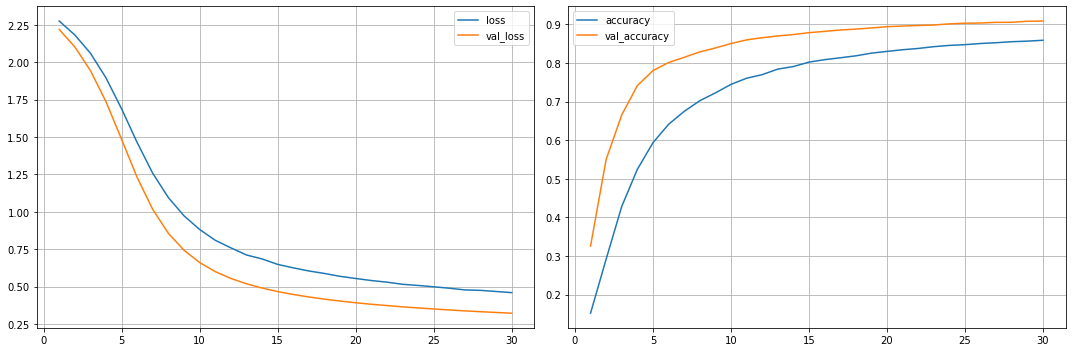

469/469 [==============================] - 187s 399ms/step - loss: 0.4594 - accuracy: 0.8589 - val_loss: 0.3220 - val_accuracy: 0.9088
The model has successfully trained
Saving the bot as mnist.h5


In [ ]:
# training the model with 30 epochs
callbacks_list = [PlotLearning()]

hist = model.fit(x_train,
                 y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(x_test, y_test),
                 callbacks=callbacks_list)
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the bot as mnist.h5")

In [ ]:
# evaluating the model

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.32200315594673157
Test accuracy: 0.9088000059127808


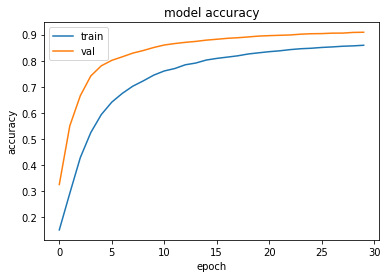

In [ ]:
# graphing model accuracy
from matplotlib import pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

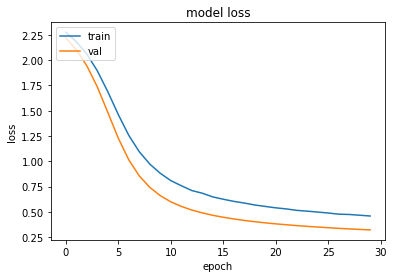

In [ ]:
# graphing model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# saving the model to use later with the testing data
model_name = 'mnist.h5'
model.save(model_name, save_format='h5')

loaded_model = tf.keras.models.load_model(model_name)

In [ ]:
# using the model to predict digit translation 

predictions_one_hot = loaded_model.predict([x_test])

313/313 [==============================] - 8s 25ms/step


In [ ]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [ ]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,0.000105,2.188098e-05,0.000156,6.483878e-04,2.422218e-04,0.000156,0.000006,9.940079e-01,0.000206,4.449804e-03
1,0.013209,7.523710e-04,0.953788,8.311766e-03,3.626834e-06,0.006510,0.010600,1.387691e-06,0.006820,3.977175e-06
2,0.000820,9.662688e-01,0.006577,2.438989e-03,2.555827e-03,0.002720,0.004336,4.560834e-03,0.006954,2.767915e-03
3,0.997031,3.283964e-07,0.000134,9.926288e-05,5.299165e-06,0.000555,0.001823,2.196930e-04,0.000087,4.444843e-05
4,0.001993,9.337842e-05,0.002275,4.429540e-04,9.148313e-01,0.001023,0.003047,1.367703e-02,0.005472,5.714520e-02
...,...,...,...,...,...,...,...,...,...,...
9995,0.000014,2.217157e-05,0.998232,8.474047e-04,1.498847e-07,0.000008,0.000007,2.262670e-05,0.000844,2.220437e-06
9996,0.000183,2.810900e-05,0.002863,9.950902e-01,3.384445e-07,0.001322,0.000011,2.943710e-04,0.000199,7.696390e-06
9997,0.000018,1.087855e-04,0.000033,1.677713e-04,7.934422e-01,0.002114,0.000267,1.257513e-02,0.010031,1.812436e-01
9998,0.005595,6.438402e-03,0.000724,9.660047e-04,8.380634e-03,0.642201,0.019372,4.227737e-03,0.310359,1.736085e-03


In [ ]:
# extracting predictions with highest probabilites and detecting what digits have been actually recognized
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [ ]:
print(predictions[0])

7


In [ ]:
# define image shape 
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
IMAGE_CHANNELS = 1

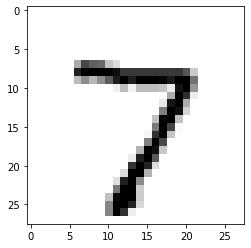

In [ ]:
# display sample image
plt.imshow(x_test[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

In [ ]:
import math

<ipython-input-36-6e0a9c4678bb>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


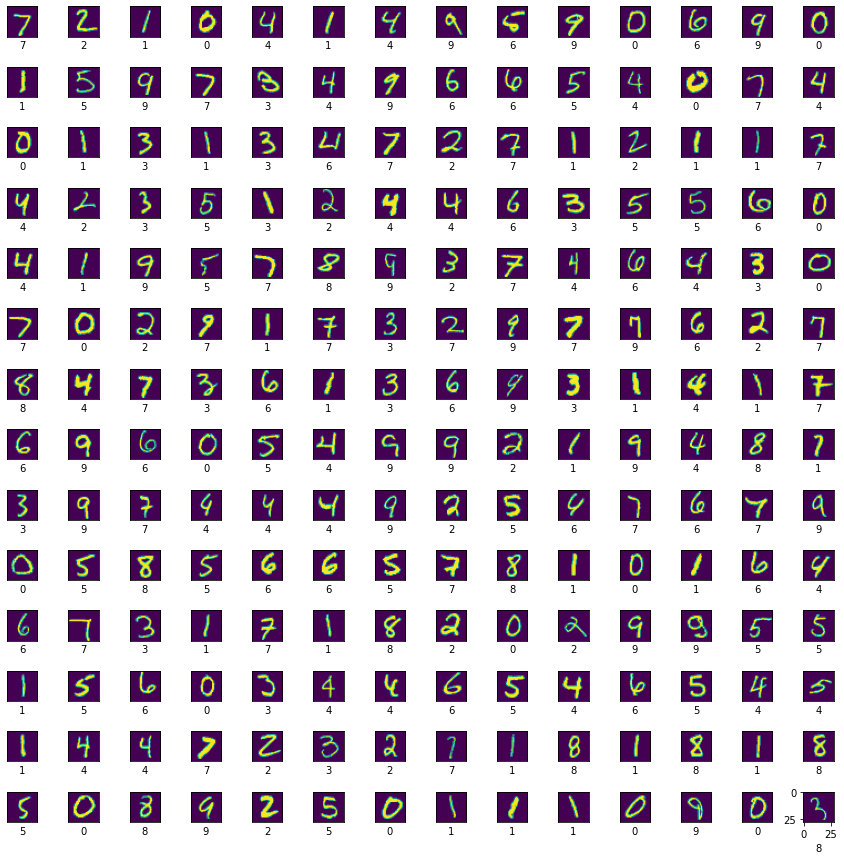

In [ ]:
# producing grid of digit pictures and predicted translations 
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)))
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()